In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
imdb_df=pd.read_csv('Documents/imdb.csv',escapechar="\\")
movie_df=pd.read_csv('Documents/movie_metadata.csv')



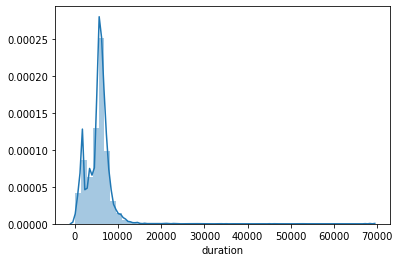

In [120]:
sns.distplot(imdb_df['duration'].dropna())

The Plot representing total gross of movies for the past 10 years

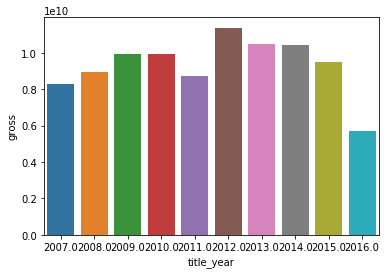

In [38]:
s=movie_df.groupby(['language','title_year'],as_index=False)['gross'].sum().reset_index()
yr=movie_df.groupby('title_year')['gross'].sum().reset_index()
sns.barplot(x='title_year',y='gross',data=yr.tail(10))


In [52]:
imdb_df.columns

Index(['fn', 'tid', 'title', 'wordsInTitle', 'url', 'imdbRating',
       'ratingCount', 'duration', 'year', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western'],
      dtype='object')

Plot for the type od movie and imdb rating based on type

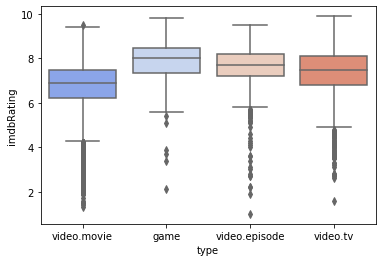

In [75]:
sns.boxplot(x='type',y='imdbRating',data=imdb_df,palette='coolwarm')

Number of Wins Based on imdbRating

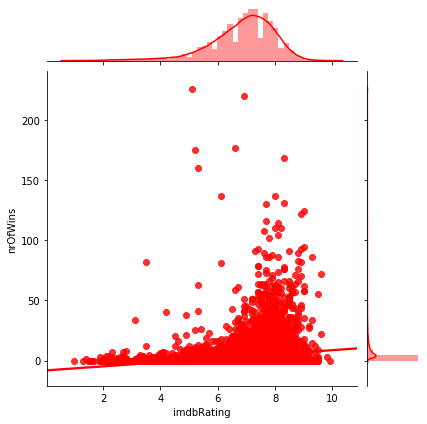

In [74]:
sns.jointplot(x='imdbRating',y='gross',data=imdb_df,kind='reg',color='red')

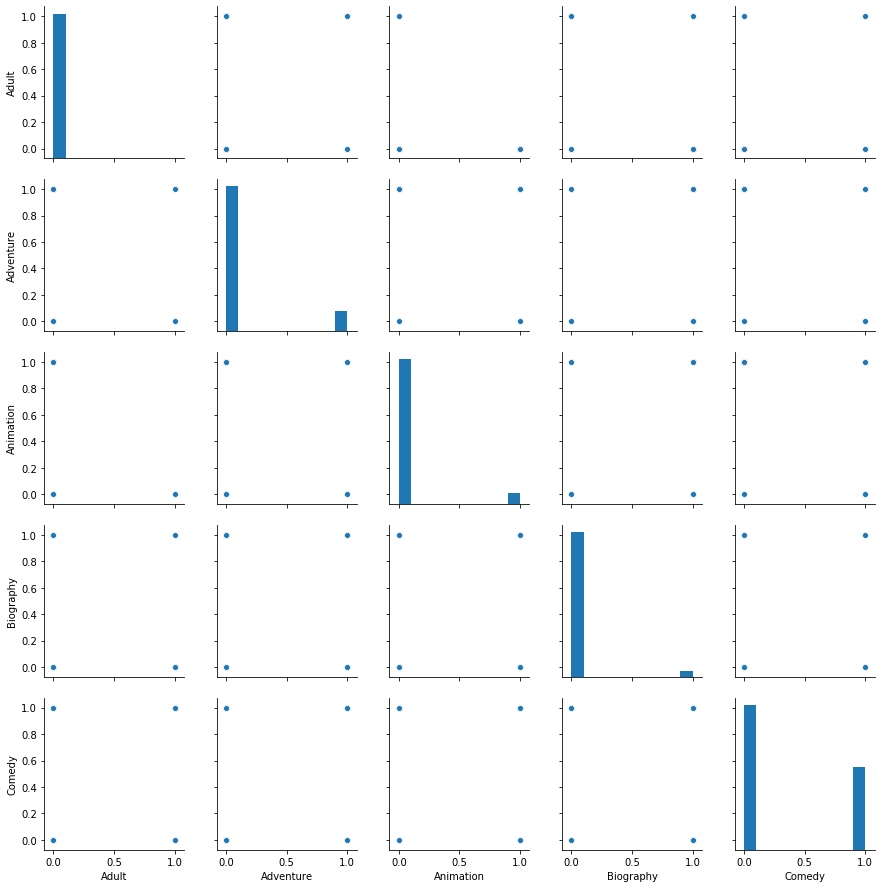

In [40]:
d=imdb_df.iloc[:,17:22]
sns.pairplot(d)

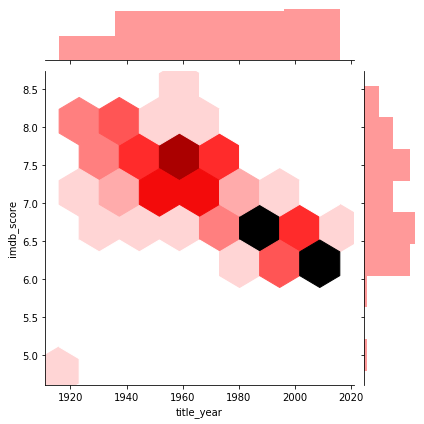

In [53]:
p=movie_df.groupby('title_year')['imdb_score'].mean().reset_index()

sns.jointplot(x='title_year',y='imdb_score',data=p,kind='hex',color='red')

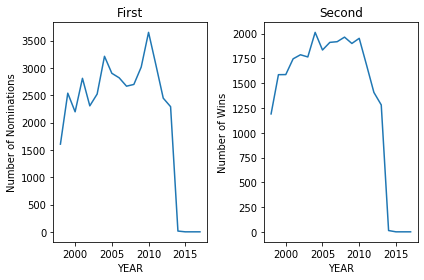

In [80]:
k=imdb_df.groupby('year')['nrOfNominations'].sum().reset_index().tail(20)
l=imdb_df.groupby('year')['nrOfWins'].sum().reset_index().tail(20)
fig,axes = plt.subplots(nrows=1,ncols=2)
axes[0].plot(k.year,k.nrOfNominations)
axes[0].set_title('First')
axes[0].set_xlabel('YEAR')
axes[0].set_ylabel('Number of Nominations')
axes[1].plot(l.year,l.nrOfWins)
axes[1].set_title('Second')
axes[1].set_xlabel('YEAR')
axes[1].set_ylabel('Number of Wins')
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Budget')

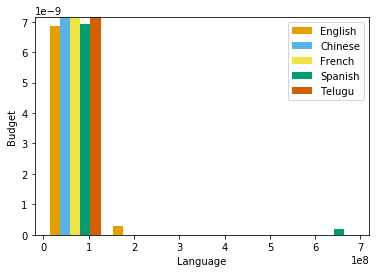

In [109]:
x=movie_df.groupby('language')['budget'].mean()
x1=movie_df[movie_df['language']=='English'].budget
x2=movie_df[movie_df['language']=='Chinese'].budget
x3=movie_df[movie_df['language']=='French'].budget
x4=movie_df[movie_df['language']=='Spanish'].budget
x5=movie_df[movie_df['language']=='Telugu'].budget
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['English', 'Chinese', 'French','Spanish', 'Telugu']
plt.hist([x1, x2, x3, x4, x5],bins=5,color = colors, label=names,normed=True)
plt.legend()
plt.xlabel('Language')
plt.ylabel('Budget')